In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Gabung seluruh data

In [54]:
main_path = 'data'
files = os.listdir(main_path)

df = pd.read_csv(os.path.join(main_path, files[0]))
for i in files[1:]:

    temp = pd.read_csv(os.path.join(main_path, i))
    df = pd.concat([df, temp], ignore_index=True)

In [55]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,pm25
0,201001,2010-01-19,DKI2 (Kelapa Gading),---,---,---,---,---,0,NaN,TIDAK ADA DATA,NaN,NaN
1,201001,2010-01-20,DKI2 (Kelapa Gading),---,---,---,---,---,0,NaN,TIDAK ADA DATA,NaN,NaN
2,201001,2010-01-21,DKI2 (Kelapa Gading),---,---,---,---,---,0,NaN,TIDAK ADA DATA,NaN,NaN
3,201001,2010-01-22,DKI2 (Kelapa Gading),---,---,---,---,---,0,NaN,TIDAK ADA DATA,NaN,NaN
4,201001,2010-01-23,DKI2 (Kelapa Gading),---,---,---,---,---,0,NaN,TIDAK ADA DATA,NaN,NaN


# Data cleaning

## Menggantikan nilai yang mencerminkan ketiadaan data menjadi Null

In [56]:
for i in df.columns[1:]:
    
    df[i] = df[i].replace({"---":None})
    df[i] = df[i].replace({'NaN':None})
    df[i] = df[i].replace({'TIDAK ADA DATA':None})

## Mengganti tipe data dan mengganti Nol menjadi Null

In [57]:
for i in [i for i in df.columns[3:8]] + ['pm25']:
    
    df[i] = df[i].astype(float)
    df[i] = df[i].replace({0:None})
    df[i] = df[i].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   periode_data  9495 non-null   int64  
 1   tanggal       9495 non-null   object 
 2   stasiun       9130 non-null   object 
 3   pm10          7736 non-null   float64
 4   so2           7808 non-null   float64
 5   co            7917 non-null   float64
 6   o3            7764 non-null   float64
 7   no2           7857 non-null   float64
 8   max           9490 non-null   object 
 9   critical      8076 non-null   object 
 10  categori      8075 non-null   object 
 11  lokasi_spku   365 non-null    object 
 12  pm25          1725 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 964.5+ KB


## Menghilangkan beberapa kolom dan menghilangkan data kosong

In [59]:
df = df[['stasiun', 'pm25'] + [i for i in df.columns[3:8]] + ['categori']]

# Exploratory data analysis

## Menghilangkan missing value dan outliers

In [60]:
df.head()

,stasiun,pm25,pm10,so2,co,o3,no2,categori
0,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN,None
1,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN,None
2,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN,None
3,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN,None
4,DKI2 (Kelapa Gading),NaN,NaN,NaN,NaN,NaN,NaN,None


In [61]:
df.dropna(inplace=True)

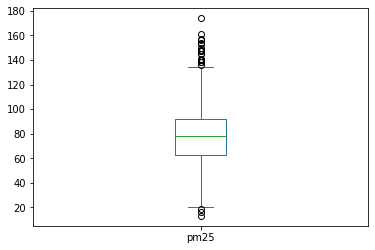

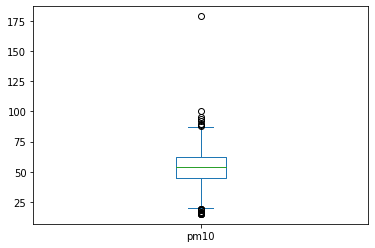

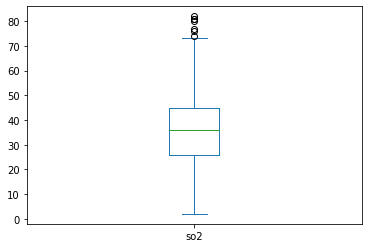

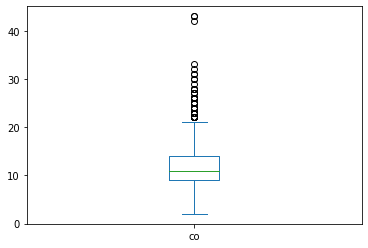

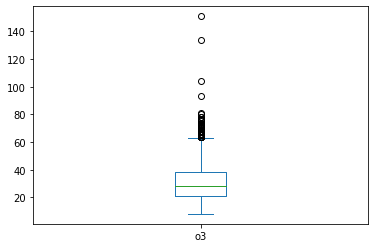

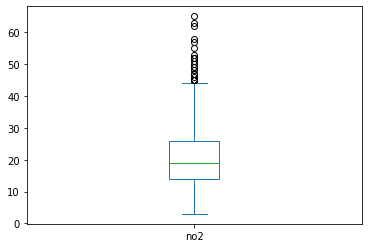

In [62]:
for i in df.columns[1:-1]:

    df.plot.box(y=i)

In [63]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

C:\Users\User\AppData\Local\Temp\ipykernel_11120\2471603361.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]


### Info data setelah dibersihkan

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 7681 to 9494
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stasiun   1335 non-null   object 
 1   pm25      1335 non-null   float64
 2   pm10      1335 non-null   float64
 3   so2       1335 non-null   float64
 4   co        1335 non-null   float64
 5   o3        1335 non-null   float64
 6   no2       1335 non-null   float64
 7   categori  1335 non-null   object 
dtypes: float64(6), object(2)
memory usage: 93.9+ KB


### Deskripsi data

In [65]:
df.describe()

,pm25,pm10,so2,co,o3,no2
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,76.836704,52.101873,35.714607,11.230712,29.732584,19.836704
std,21.290706,13.507346,11.966854,3.729511,11.996612,8.373067
min,20.000000,20.000000,4.000000,2.000000,8.000000,3.000000
25%,62.000000,44.000000,26.000000,9.000000,21.000000,14.000000
50%,77.000000,54.000000,35.000000,11.000000,27.000000,18.000000
75%,91.000000,61.000000,45.000000,14.000000,36.000000,25.000000
max,134.000000,87.000000,73.000000,21.000000,63.000000,44.000000


## Univariative data analysis

                                  jumlah sampel  persentase
DKI1 (Bunderan HI)                          339        25.4
DKI3 (Jagakarsa)                            285        21.3
DKI2 (Kelapa Gading)                        254        19.0
DKI4 (Lubang Buaya)                         240        18.0
DKI5 (Kebon Jeruk) Jakarta Barat            217        16.3
             jumlah sampel  persentase
SEDANG                1039        77.8
TIDAK SEHAT            186        13.9
BAIK                   110         8.2


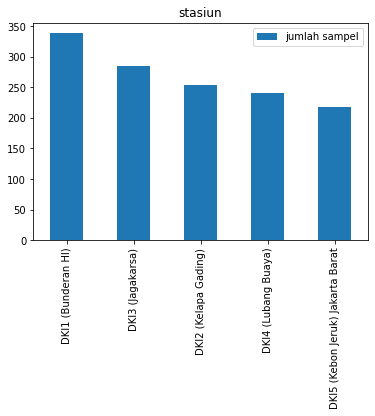

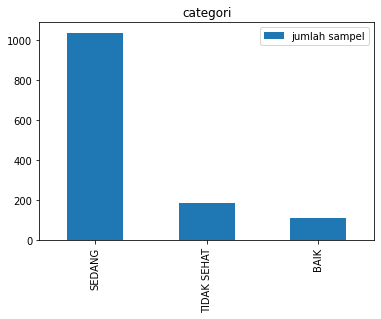

In [66]:
for feature in ['stasiun', 'categori']:

    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(data)
    data.plot(y='jumlah sampel',
              kind='bar',
              title=feature)

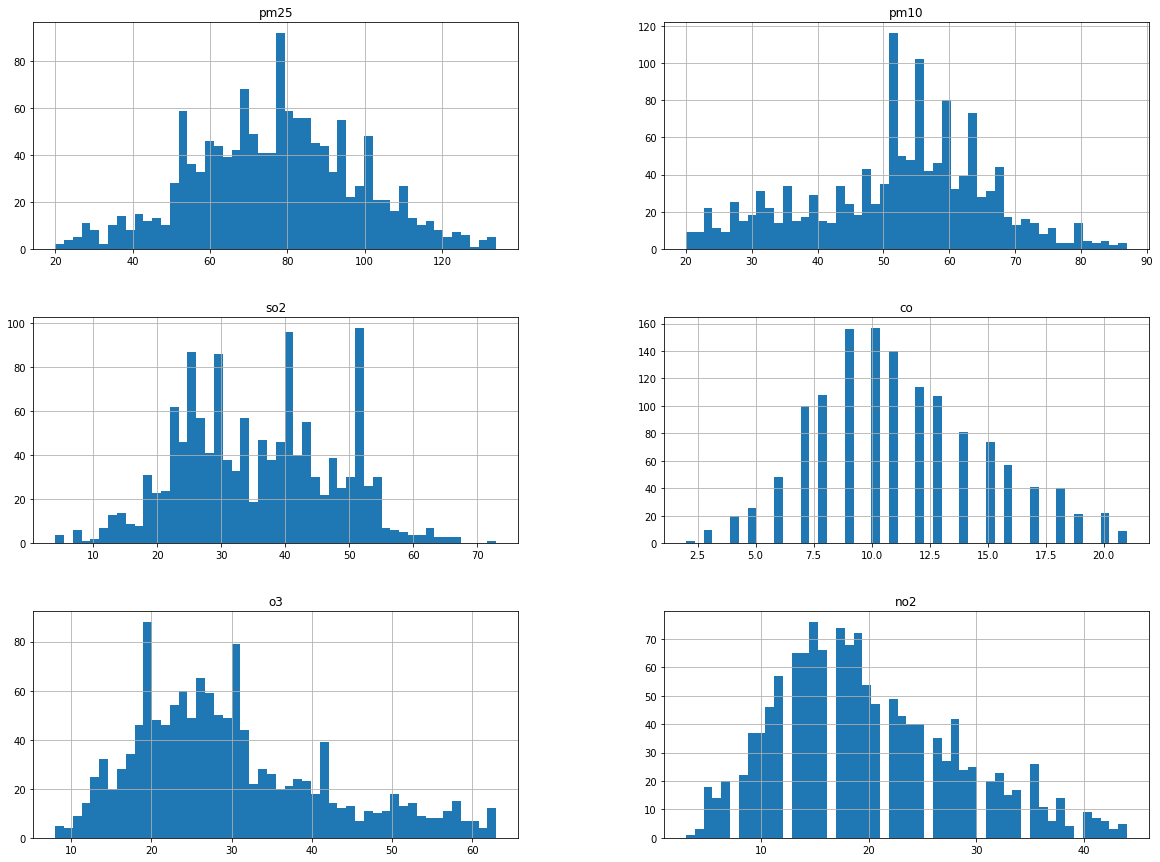

In [67]:
df[1:-1].hist(bins=50, figsize=(20,15))
plt.show()

## Multivariative data analysis

                   pm25       pm10        so2         co         o3        no2
categori                                                                      
BAIK          41.136364  27.890909  26.081818   8.336364  23.463636  12.227273
SEDANG        74.502406  51.742060  35.841193  11.330125  30.053898  20.158807
TIDAK SEHAT  110.989247  68.430108  40.704301  12.387097  31.645161  22.537634


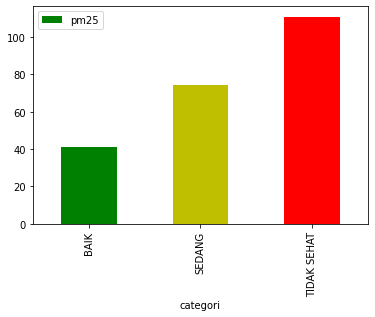

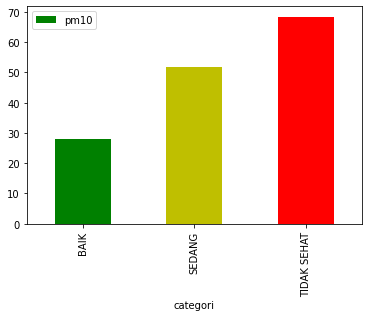

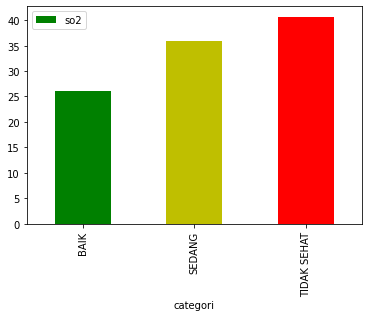

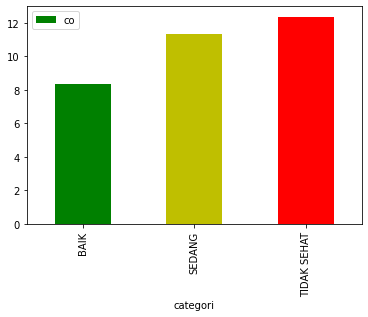

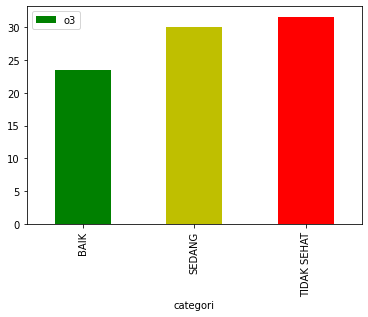

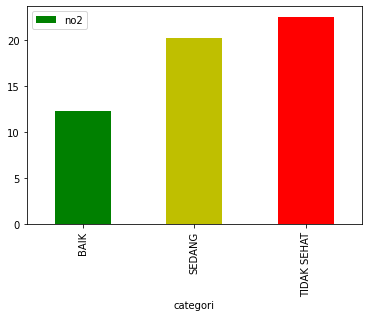

In [68]:
agg = dict(zip([i for i in df.columns[1:-1]], ['mean' for i in range(6)]))
data = df.groupby('categori').agg(agg)
print(data)

for i in data.columns:
    data.plot.bar(y=i,
                  color=['g','y','r'])

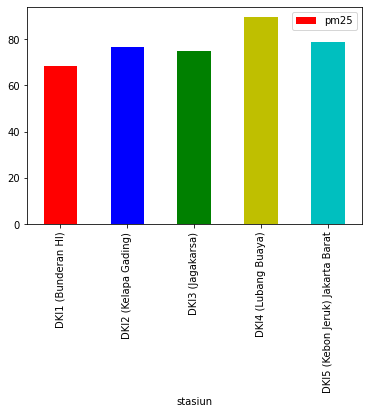

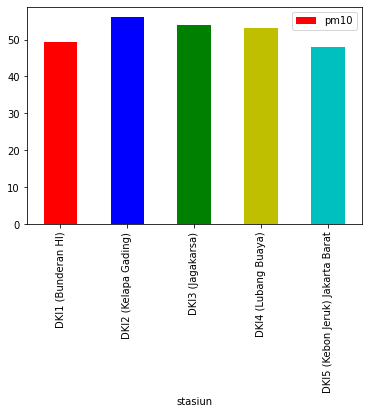

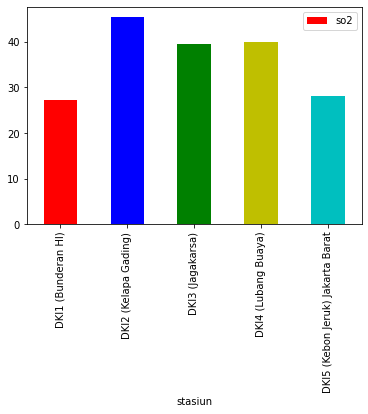

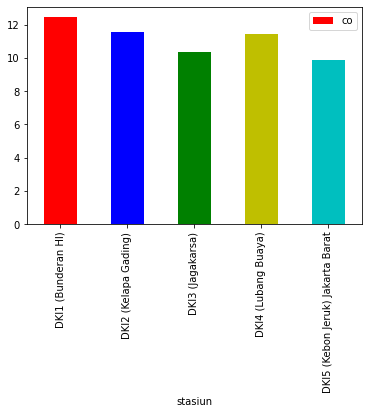

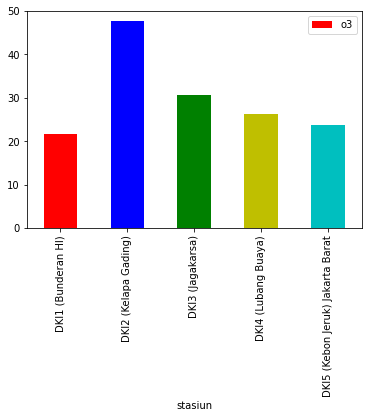

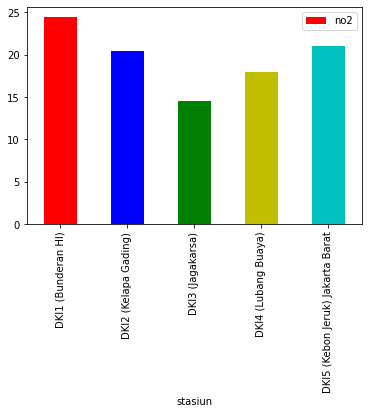

In [69]:
agg = dict(zip([i for i in df.columns[1:-1]], ['mean' for i in range(6)]))
data = df.groupby('stasiun').agg(agg)

for i in data.columns:
    data.plot.bar(y=i,
                  color=['r', 'b', 'g', 'y', 'c'])

# Data Preparation

## Menghilangkan kolom stasiun

In [70]:
df = df[df.columns[1:]]

## Mengganti data kategori menjadi numerik

In [71]:
replacement = dict(zip(df['categori'].drop_duplicates(), [i for i in range(3)]))
df['categori'] = df['categori'].replace(replacement)

## Normalisasi data numerik (bukan label)

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()
scaler.fit(df[df.columns[:-1]])
df[df.columns[:-1]] = scaler.transform(df.loc[:, df.columns[:-1]])

## Membagi data menjadi data latih dan data uji

In [74]:
from sklearn.model_selection import train_test_split as tts

In [75]:
x, y = df.drop(columns=['categori']), df['categori']
x_train, x_test, y_train, y_test = tts(x, y,
                                       random_state=20,
                                       test_size=0.2)

# Model development

## Menguji dan memilih ketiga model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Mengimpor library metrik pengukuran

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [78]:
models = [KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GaussianNB()]

hasil = {'model':[],
         'accuracy':[],
         'precision':[],
         'recall':[]}

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    
    hasil['model'].append(str(model))
    hasil['accuracy'].append(acc)
    hasil['precision'].append(prec)
    hasil['recall'].append(rec)

    print(str(model), acc)

KNeighborsClassifier() 0.9176029962546817
DecisionTreeClassifier() 0.9812734082397003
RandomForestClassifier() 0.9887640449438202
GaussianNB() 0.9101123595505618


# Evaluasi model

                      model  accuracy  precision    recall
2  RandomForestClassifier()  0.988764   0.989121  0.988764
1  DecisionTreeClassifier()  0.981273   0.983263  0.981273
0    KNeighborsClassifier()  0.917603   0.915193  0.917603
3              GaussianNB()  0.910112   0.929939  0.910112


<Axes: xlabel='model'>

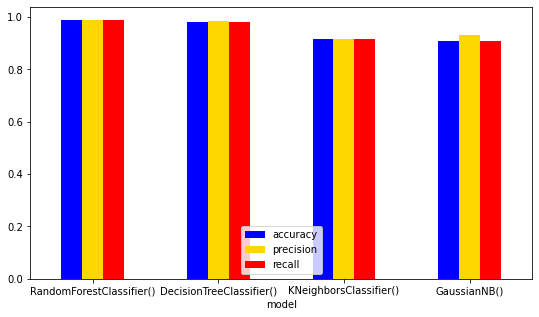

In [79]:
hasil = pd.DataFrame(hasil).sort_values(['accuracy', 'precision', 'recall'], ascending=False)
print(hasil)
hasil.plot.bar(x='model', color=['b', 'gold', 'r'], rot=0, figsize=(9,5))

# Model development part 2

## Melakukan upgrade yaitu hyperparameter tuning menggunakan randomized search cv

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [82]:
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator=clf,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

clf_random.fit(x_train, y_train)
clf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

# Evaluasi model part 2

## Menguji ulang model dengan parameter yang sudah diupgrade

In [83]:
args = clf_random.best_params_
clf = RandomForestClassifier(**args)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9962546816479401

## Menyimpan model

In [84]:
from pickle import dump

In [85]:
# dump(clf, open('classifier.pkl', 'wb'))